In [1]:
import ikpy.chain
import numpy as np
import ikpy.utils.plot as plot_utils
import math

In [142]:
my_chain = ikpy.chain.Chain.from_urdf_file("/home/maven/robot_arm_ws/src/robot_arm_description/urdf/temp.urdf", active_links_mask=[False, True, True, True, True, True, True])

In [3]:
print(my_chain.links)

[Link name=Base link bounds=(-inf, inf), URDF Link joint_1 :
    Type : revolute
    Bounds : (-2.443461, 2.443461)
    Origin Translation : [0.       0.       0.117341]
    Origin Orientation : [0. 0. 0.]
    Rotation : [-0. -0.  1.]
    Translation: None, URDF Link joint_2 :
    Type : revolute
    Bounds : (-2.443461, 2.443461)
    Origin Translation : [0.    0.    0.082]
    Origin Orientation : [0. 0. 0.]
    Rotation : [-1. -0. -0.]
    Translation: None, URDF Link joint_3 :
    Type : revolute
    Bounds : (-2.443461, 2.443461)
    Origin Translation : [0.       0.       0.299166]
    Origin Orientation : [0. 0. 0.]
    Rotation : [1. 0. 0.]
    Translation: None, URDF Link joint_4 :
    Type : revolute
    Bounds : (-2.443461, 2.443461)
    Origin Translation : [0.       0.       0.097887]
    Origin Orientation : [0. 0. 0.]
    Rotation : [-0.  1. -0.]
    Translation: None, URDF Link joint_5 :
    Type : revolute
    Bounds : (-2.443461, 2.443461)
    Origin Translation : [0.

In [44]:
# target_position = [ 0.0,       0.3145,   0.596394]
target_position = [ 0.5   ,   0.245  , 0.196394]
target_orientation= [0,1,0]
target_angles = [0,0,-55,-87,0,0,0]

ik=my_chain.inverse_kinematics(target_position, target_orientation, orientation_mode="Y")
print(ik)

fk=my_chain.forward_kinematics(ik)
print (fk[:3, 3])
print(fk[:3,0])
print(fk[:3,1])
print(fk[:3,2])
print(fk)

[ 0.         -1.15628945  1.12764298  0.35775362 -1.27360219  1.27744566
  0.        ]
[0.50000001 0.245      0.196394  ]
[7.27118012e-01 2.53890020e-10 6.86512489e-01]
[-5.45764545e-11  1.00000000e+00 -3.12021353e-10]
[-6.86512489e-01  1.89408933e-10  7.27118012e-01]
[[ 7.27118012e-01 -5.45764545e-11 -6.86512489e-01  5.00000009e-01]
 [ 2.53890020e-10  1.00000000e+00  1.89408933e-10  2.45000004e-01]
 [ 6.86512489e-01 -3.12021353e-10  7.27118012e-01  1.96393999e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


[0.0, 0.0, 0.0, 1.5707963267948966, 0.0, 1.5707963267948966, 1.5707963267948966]
Computed position vector : [ 0.       -0.122887  0.788007], original position vector : [0, 0, 0, 90, 0, 90, 90]
[[ 6.12323400e-17  0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 1.22464680e-16 -1.00000000e+00 -7.49879891e-33 -1.22887000e-01]
 [ 1.00000000e+00  1.22464680e-16 -6.12323400e-17  7.88007000e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[ 0.       -0.122887  0.788007]
[ 0.          0.69515698  0.06727638  1.62921756  2.443461   -1.5775954
 -1.57648828]
The angles of each joints are %s  [0.0, 39.82956121563721, 3.8546524828651374, 93.34728993830494, 140.0000027048156, -90.3895581201205, -90.32612512003733]


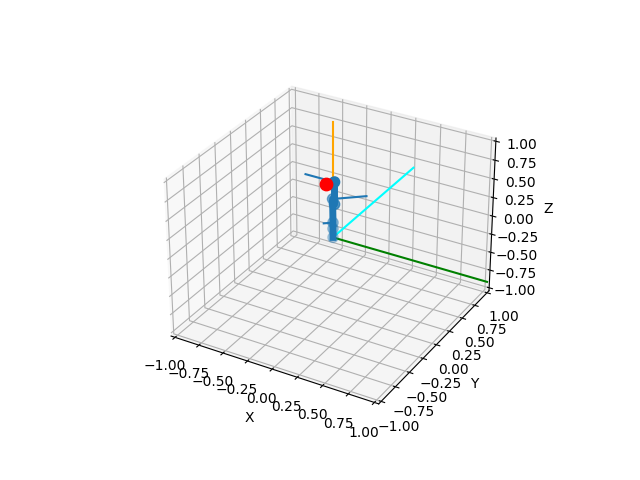

In [151]:
target_angles = [0,0,0,90,0,90,90]
angles = [math.radians(target_angles[0]),
          math.radians(target_angles[1]),
          math.radians(target_angles[2]),
          math.radians(target_angles[3]),
          math.radians(target_angles[4]),
          math.radians(target_angles[5]),
          math.radians(target_angles[6])]
print(angles)
fk=my_chain.forward_kinematics(angles)
print("Computed position vector : %s, original position vector : %s" % (fk[:3, 3], target_angles))

print(fk)
target_position=fk[:3, 3]
target_orientation=fk[:3,:3]
print(target_position)
# ik=my_chain.inverse_kinematics_frame(fk)
ik=my_chain.inverse_kinematics(target_position=target_position, target_orientation=target_orientation, orientation_mode="all")

print(ik)
print("The angles of each joints are %s ", list(map(lambda r:math.degrees(r), ik.tolist())))

fig, ax = plot_utils.init_3d_figure()
my_chain.plot(ik, ax, target=target_position, show=True)
fig.set_figheight(9)
fig.set_figwidth(13)
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
ax.set_zlim(0.0, 0.6)
plt.ion()
ax.legend()

[ 0.0480973  -0.08275612  0.78818528]
[-2.95527210e-03 -9.99995633e-01 -1.55619662e-05]
[[-2.36108449e-08 -2.95527210e-03  9.99995633e-01  4.80972970e-02]
 [-1.55619644e-05 -9.99995633e-01 -2.95527210e-03 -8.27561163e-02]
 [ 1.00000000e+00 -1.55619662e-05 -2.23790973e-08  7.88185279e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[ 0.          0.69515698  0.06727638  1.62921756  2.443461   -1.5775954
 -1.57648828]
[ 0.         -2.443461   -0.06727721  0.86026193 -0.81214662 -1.09468945
 -1.12040519]
The angles of each joints are %s  [0.0, -140.00000269138428, -3.85470002220237, 49.28937781947553, -46.532573556257866, -62.72108519069884, -64.19448856343242]
[ 0.0480973  -0.08275612  0.78818528]


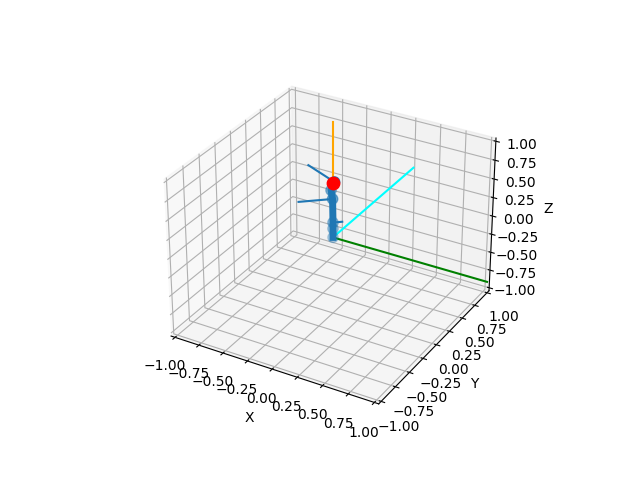

In [150]:
fk=my_chain.forward_kinematics(ik)
print (fk[:3, 3])
print(fk[:3,1])
print(fk)
print(ik)

target_position=fk[:3, 3]
ik=my_chain.inverse_kinematics(target_position=target_position, target_orientation=fk[:3,:3], orientation_mode="all")

print(ik)
print("The angles of each joints are %s ", list(map(lambda r:math.degrees(r), ik.tolist())))

print(target_position)

fig, ax = plot_utils.init_3d_figure()
my_chain.plot(ik, ax, target=target_position, show=True)
fig.set_figheight(9)
fig.set_figwidth(13)
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
ax.set_zlim(0.0, 0.6)
plt.ion()
ax.legend()


In [6]:
computed_position= my_chain.forward_kinematics(ik)
print("Computed position vector : %s, original position vector : %s" % (computed_position[:3, 3], target_position))
print("Computed position (readable : %s" % ['%.2f' % elem for elem in computed_position[:3, 3]])

Computed position vector : [0.       0.3145   0.596394], original position vector : [0.5, 0.245, 0.196394]
Computed position (readable : ['0.00', '0.31', '0.60']


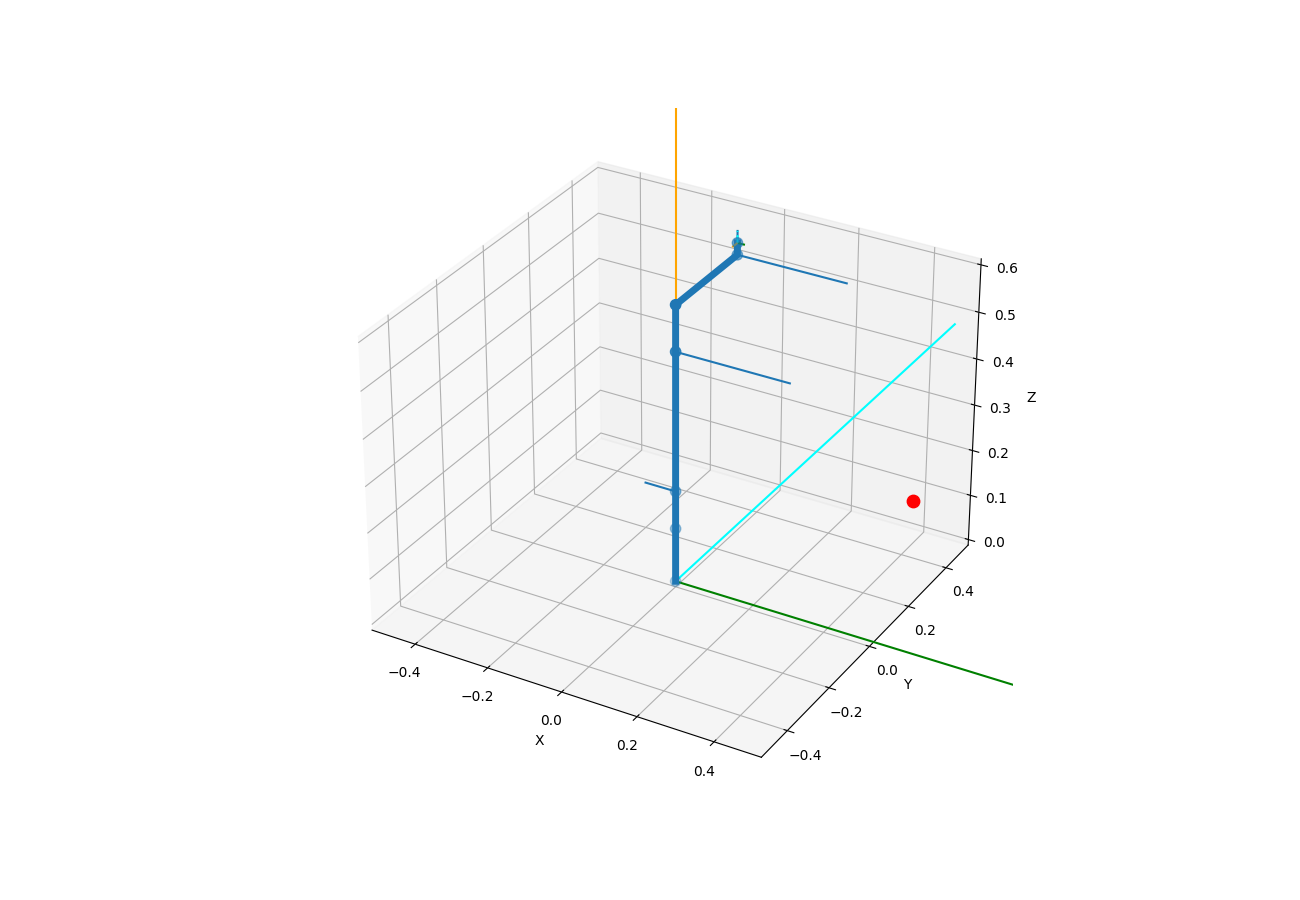

In [61]:
# Optional: support /home/maven/robot_arm_ws/src/robot_arm_description/urdf/temp.urdffor 3D plotting in the NB
# If there is a matplotlib error, uncomment the next line, and comment the line below it.
# %matplotlib inline
%matplotlib widget
import matplotlib.pyplot as plt
fig, ax = plot_utils.init_3d_figure()
fig.set_figheight(9)
fig.set_figwidth(13)
my_chain.plot(ik, ax, target=target_position)
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
ax.set_zlim(0.0, 0.6)
plt.ion()

In [44]:
import serial
import time

arduino = serial.Serial(port='/dev/ttyUSB1', baudrate=115200, timeout=None)

def doIK(mode = "Z"):
    global ik
    old_position = ik.copy()
    ik=my_chain.inverse_kinematics(target_position, target_orientation,orientation_mode=mode)
    # print(ik)
    angles = list(map(lambda r:math.degrees(r), ik.tolist()))
    # print(["%.4f" % elem for elem in angles])

def doIK2():
    global ik
    global target_orientation
    global target_position
    old_position = ik.copy()
    ik=my_chain.inverse_kinematics(target_position=target_position, target_orientation=target_orientation,orientation_mode="all")
    print(ik)
    angles = list(map(lambda r:math.degrees(r), ik.tolist()))
    print(["%.4f" % elem for elem in angles])
    
def doFK(a,b,c,d,e,f):
    global ik
    global fk
    target_angles = [math.radians(0.0), math.radians(a),math.radians(b),math.radians(c),math.radians(d),math.radians(e),math.radians(f)]
    print(["%.4f" % elem for elem in target_angles])
    fk=my_chain.forward_kinematics(target_angles)
    print(fk[:3,3])
    print(fk[:3,0])
    print(fk[:3,:3])
    print(fk)
    ik=my_chain.inverse_kinematics(target_position=fk[:3,3], target_orientation=fk[:3,:3], orientation_mode="all")
    angles = list(map(lambda r:math.degrees(r), ik.tolist()))
    # print(["%.2f" % elem for elem in angles])
    # print("Computed position (readable : %s" % ['%.2f' % elem for elem in fk[:3, 3]])
    # print(fk[:3, :3])
    # print("The angles of each joints are %s ", list(map(lambda r:math.degrees(r), ik.tolist())))
    
def updatePlot(data):
    global target_position
    print(target_position)
    fig, ax = plot_utils.init_3d_figure()
    my_chain.plot(ik, ax, target=target_position, show=True)
    fig.set_figheight(9)
    fig.set_figwidth(13)
    plt.xlim(-0.5, 0.5)
    plt.ylim(-0.5, 0.5)
    ax.set_zlim(0.0, 0.6)
    plt.ion()
    ax.legend()


def move2():
    global target_position
    global target_orientation
    global ik
    # target_position = [x,y,z]
    # target_orientation= [math.radians(r1),math.radians(r2),math.radians(r3)]
    print(target_position)
    print(target_orientation)
    doIK2()
    moveJoints(ik[1].item(),ik[2].item(),ik[3].item(),ik[4].item(),ik[5].item(),ik[6].item())
    # updatePlot(ik)
    
def move3(mode, initSpeed=0.0, finalSpeed=0.0):
    global target_position
    global target_orientation
    global ik
    # target_position = [x,y,z]
    # target_orientation= [math.radians(r1),math.radians(r2),math.radians(r3)]
    doIK(mode=mode)
    moveJoints(ik[1].item(),ik[2].item(),ik[3].item(),ik[4].item(),ik[5].item(),ik[6].item(),initSpeed, finalSpeed)
    # updatePlot(ik)

    
def move(x,y,z,r1,r2,r3, initSpeed=0.0, finalSpeed=0.0 ):
    global target_position
    global target_orientation
    global ik
    target_position = [x,y,z]
    target_orientation= [math.radians(r1),math.radians(r2),math.radians(r3)]
    print(target_position)
    print(target_orientation)
    doIK()
    moveJoints(ik[1].item(),ik[2].item(),ik[3].item(),ik[4].item(),ik[5].item(),ik[6].item(),initSpeed,finalSpeed)
    # updatePlot(ik)
                                    
def moveFK(a,b,c,d,e,f, initSpeed=0.0,finalSpeed=0.0):
    global fk
    doFK(a,b,c,d,e,f)
    updatePlot(ik)
    moveJoints(ik[1].item(),ik[2].item(),ik[3].item(),ik[4].item(),ik[5].item(),ik[6].item(),initSpeed, finalSpeed)
                                    

def sendCommand(command):
    print(command.encode('ascii'))
    arduino.write(command.encode('ascii'))
    print("Command Send")
    print(arduino.readline())
    print("Command Read")
    
def moveJoints(a,b,c,d,e,f,initSpeed=0.0, finalSpeed=0.0):
    command = '{}{:.4f},{:.4f},{:.4f},{:.4f},{:.4f},{:.4f},{:.2f},{:.2f}\n'.format("MN",math.degrees(a),math.degrees(b),math.degrees(c),math.degrees(d),math.degrees(e),math.degrees(f),initSpeed, finalSpeed)
    print(command)
    sendCommand(command)
    
def goHome():
    sendCommand("HOME\n")
    
def goInit():
    command = 'MV{:.4f},{:.4f},{:.4f},{:.4f},{:.4f},{:.4f},{:.2f},{:.2f}\r\n'.format(0.0,-55.0,-87.0,0.0,0.0,0.0,0.0,0.0)
    sendCommand(command)
    
def openGripper(steps):
    command = 'GR{0}\n'.format(steps)
    sendCommand(command)
    
def resetGripper(steps):
    command = 'RS{0}\r\n'.format(steps)
    sendCommand(command)
    
def setSpeed(speed):
    command = 'SP{0}\n'.format(speed)
    sendCommand(command)
    

In [14]:
resetGripper(0)

b'RS0!'
Command Send
b'\r\n'
Command Read


In [72]:
openGripper(0)

b'GR0\n'
Command Send
b'\r\n'
Command Read


In [69]:
# setSpeed(30)
goInit()

b'MV0.0000,-55.0000,-87.0000,0.0000,0.0000,0.0000,0.00,0.00\r\n'
Command Send
b'\r\n'
Command Read


In [65]:
# setSpeed(30)
goHome()

b'HOME\n'
Command Send
b'\r\n'
Command Read


In [28]:
moveJoints(5,-55,87,0,0,0,0,0)

MN286.4789,-3151.2679,4984.7328,0.0000,0.0000,0.0000,0.00,0.00

b'MN286.4789,-3151.2679,4984.7328,0.0000,0.0000,0.0000,0.00,0.00\n'
Command Send
b'\r\n'
Command Read


In [10]:
move(0.0,       0.3145,   0.596394,0,0,0) # HOME
# # openGripper(1000)
move(0,       0.30,   0.45,0,180,0)
# openGripper(1000)
move(0,       0.30,   0.35,0,180,0)
# openGripper(100)
move(0,       0.30,   0.45,0,180,0)

move(0.2,       0.30,   0.45,60,90,0)
move(0.2,       0.30,   0.35,60,90,0)
# openGripper(1000)
move(0.2,       0.30,   0.45,60,90,0)
move(0.2,       0.30,   0.35,60,90,0)
# openGripper(100)
move(0.2,       0.30,   0.45,60,90,0)
move(-0.2,       0.30,   0.45,-60,90,0)
move(-0.2,       0.30,   0.35,-60,90,0)
# openGripper(1000)
move(-0.2,       0.30,   0.45,-60,90,0)
move(-0.2,       0.30,   0.35,-60,90,0)
# openGripper(100)
move(-0.2,       0.30,   0.45,-60,90,0)
move(0,       0.30,   0.55,0,180,0)
move(0,       0.30,   0.35,0,180,0)
# openGripper(1000)
move(0,       0.30,   0.45,0,180,0)
# openGripper(0)
move(0.0,       0.3145,   0.56394,0,180,0) # HOME
move(0.0,       0.3145,   0.596394,0,0,0) # HOME
# # goInit()



[0.0, 0.3145, 0.596394]
[0.0, 0.0, 0.0]
MN0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.00

b'MN0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.00\n'
Command Send
b'\r\n'
Command Read
[0, 0.3, 0.45]
[0.0, 3.141592653589793, 0.0]
MN0.1953,-0.9769,-24.1545,-2.3595,-66.8453,1.1195,0.00,0.00

b'MN0.1953,-0.9769,-24.1545,-2.3595,-66.8453,1.1195,0.00,0.00\n'
Command Send
b'\r\n'
Command Read
[0, 0.3, 0.35]
[0.0, 3.141592653589793, 0.0]
MN0.0001,3.8935,-38.5106,-0.0007,-47.5935,0.0006,0.00,0.00

b'MN0.0001,3.8935,-38.5106,-0.0007,-47.5935,0.0006,0.00,0.00\n'
Command Send
b'\r\n'
Command Read
[0, 0.3, 0.45]
[0.0, 3.141592653589793, 0.0]
MN0.1953,-0.9769,-24.1545,-2.3595,-66.8453,1.1195,0.00,0.00

b'MN0.1953,-0.9769,-24.1545,-2.3595,-66.8453,1.1195,0.00,0.00\n'
Command Send
b'\r\n'
Command Read
[0.2, 0.3, 0.45]
[1.0471975511965976, 1.5707963267948966, 0.0]
MN-33.7339,10.6919,-11.4256,0.6823,-67.8848,-0.3030,0.00,0.00

b'MN-33.7339,10.6919,-11.4256,0.6823,-67.8848,-0.3030,0.00,0.00\n'
Comman

In [50]:
move(0.0,       0.3145,   0.596394,0,0,0) # HOME
move(0.0,       0.25,   0.2,0,0,120) # HOME
# openGripper(1500)
move(0.0,       0.4,   0.2,0,0,100) # HOME
# move(0.0,       0.5,   0.22,-10,0,100) # HOME
# openGripper(0)
move(0.0,       0.4,   0.5,0,0,100) # HOME
move(0.2,       0.4,   0.5,0,0,100) # HOME
move(-0.2,       0.4,   0.5,0,0,100) # HOME
move(0.0,       0.4,   0.2,0,0,100) # HOME
# openGripper(1500)
move(0.0,       0.25,   0.2,0,0,120) # HOME
move(0.0,       0.3145,   0.596394,0,0,0) # HOME
# openGripper(0)


move(0.0,       0.5,   0.5,-90,0,100) # HOME
move(0.0,       0.5,   0.22,-10,0,100) # HOME
# openGripper(1500)
# move(0.0,       0.4,   0.22,-10,0,100) # HOME
# move(0.0,       0.3145,   0.596394,0,0,0) # HOME
# openGripper(0)

[0.0, 0.3145, 0.596394]
[0.0, 0.0, 0.0]
MN0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.00

b'MN0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.00\n'
Command Send
b'\r\n'
Command Read
[0.0, 0.25, 0.2]
[0.0, 0.0, 2.0943951023931953]
MN-0.9026,20.1693,-64.9540,-9.0958,85.1840,0.7690,0.00,0.00

b'MN-0.9026,20.1693,-64.9540,-9.0958,85.1840,0.7690,0.00,0.00\n'
Command Send
b'\r\n'
Command Read
b'GR1500\n'
Command Send
b'\r\n'
Command Read
[0.0, 0.4, 0.2]
[0.0, 0.0, 1.7453292519943295]
MN0.4304,37.4666,-32.0057,7.3668,69.6300,-2.5744,0.00,0.00

b'MN0.4304,37.4666,-32.0057,7.3668,69.6300,-2.5744,0.00,0.00\n'
Command Send
b'\r\n'
Command Read
b'GR0\n'
Command Send
b'\r\n'
Command Read
[0.0, 0.4, 0.5]
[0.0, 0.0, 1.7453292519943295]
MN0.0317,13.4438,-3.4205,1.7458,16.8687,-1.6721,0.00,0.00

b'MN0.0317,13.4438,-3.4205,1.7458,16.8687,-1.6721,0.00,0.00\n'
Command Send
b'\r\n'
Command Read
[0.2, 0.4, 0.5]
[0.0, 0.0, 1.7453292519943295]
MN-26.5941,23.1655,9.2919,-2.1665,13.8820,2.1060,0.00,0.00



In [49]:
 move(0.0,       0.3145,   0.596394,0,0,0) # HOME
# openGripper(400)
move(0,       0.30,   0.34,0,180,20)
# openGripper(50)
move(0,       0.30,   0.5,0,180,20)
move(0.2,       0.30,   0.5,0,100,0)

# moveFK(-33.1392,10.8487,-1.9273,-8.1495,-77.0466,-0.3577)
move(0,       0.30,   0.5,0,180,20)
# move(0,       0.40,   0.5,0,180,20)
move(0,       0.30,   0.315,0,180,20)
# openGripper(400)
move(0,       0.30,   0.5,0,180,20)
# openGripper(0)

[0.0, 0.3145, 0.596394]
[0.0, 0.0, 0.0]
MN0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.00

b'MN0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.00\n'
Command Send
b'\r\n'
Command Read
[0, 0.3, 0.34]
[0.0, 3.141592653589793, 0.3490658503988659]
MN-0.9364,4.4265,-40.0416,17.8508,-40.7791,-14.6612,0.00,0.00

b'MN-0.9364,4.4265,-40.0416,17.8508,-40.7791,-14.6612,0.00,0.00\n'
Command Send
b'\r\n'
Command Read
[0, 0.3, 0.5]
[0.0, 3.141592653589793, 0.3490658503988659]
MN-1.2084,-1.4634,-15.4695,15.9099,-70.6800,-6.6331,0.00,0.00

b'MN-1.2084,-1.4634,-15.4695,15.9099,-70.6800,-6.6331,0.00,0.00\n'
Command Send
b'\r\n'
Command Read
[0.2, 0.3, 0.5]
[0.0, 1.7453292519943295, 0.0]
MN-32.0240,9.5185,-4.0303,-28.1534,-62.7077,-21.9539,0.00,0.00

b'MN-32.0240,9.5185,-4.0303,-28.1534,-62.7077,-21.9539,0.00,0.00\n'
Command Send
b'\r\n'
Command Read
[0, 0.3, 0.5]
[0.0, 3.141592653589793, 0.3490658503988659]
MN-1.2084,-1.4634,-15.4695,15.9099,-70.6800,-6.6331,0.00,0.00

b'MN-1.2084,-1.4634,-15.4695,1

In [46]:
setSpeed(40.0)
move(0.0,       0.3145,   0.596394,0,0,0) # HOME


target_position = [-0.00287418,  0.29978782,  0.4]
target_orientation =[[ 0.99995404, -0.00162445, -0.00944832],
 [ 0.00958695,  0.16943632,  0.98549451],
 [ 0.,         -0.9855398,   0.16944411]]
move2()
# openGripper(800)

target_position = [-0.00287418,  0.29978782,  0.340]
target_orientation =[[ 0.99995404, -0.00162445, -0.00944832],
 [ 0.00958695,  0.16943632,  0.98549451],
 [ 0.,         -0.9855398,   0.16944411]]
move2()
# openGripper(50)


target_position = [0.3, 0.2, 0.5]
target_orientation =[[-0.19835367 , 0.13290502 , 0.97107779],
 [-0.96408205,  0.15209989, -0.21774163],
 [-0.17663978, -0.97938852,  0.09796178]]
move2()

target_position = [0.3, 0.2, 0.312]
target_orientation =[[-0.19835367 , 0.13290502 , 0.97107779],
 [-0.96408205,  0.15209989, -0.21774163],
 [-0.17663978, -0.97938852,  0.09796178]]
move2()
# openGripper(800)


target_position = [0.3, 0.2, 0.5]
target_orientation =[[-0.19835367 , 0.13290502 , 0.97107779],
 [-0.96408205,  0.15209989, -0.21774163],
 [-0.17663978, -0.97938852,  0.09796178]]
move2()



target_position = [-0.00287418,  0.29978782,  0.5]
target_orientation =[[ 0.99995404, -0.00162445, -0.00944832],
 [ 0.00958695,  0.16943632,  0.98549451],
 [ 0.,         -0.9855398,   0.16944411]]
move2()



target_position = [-0.00287418,  0.29978782,  0.33]
target_orientation =[[ 0.99995404, -0.00162445, -0.00944832],
 [ 0.00958695,  0.16943632,  0.98549451],
 [ 0.,         -0.9855398,   0.16944411]]
move2()
# openGripper(50)

target_position = [-0.00287418,  0.29978782,  0.5]
target_orientation =[[ 0.99995404, -0.00162445, -0.00944832],
 [ 0.00958695,  0.16943632,  0.98549451],
 [ 0.,         -0.9855398,   0.16944411]]
move2()


target_position = [0.3, 0.2, 0.5]
target_orientation =[[-0.19835367 , 0.13290502 , 0.97107779],
 [-0.96408205,  0.15209989, -0.21774163],
 [-0.17663978, -0.97938852,  0.09796178]]
move2()

target_position = [0.3, 0.2, 0.33]
target_orientation =[[-0.19835367 , 0.13290502 , 0.97107779],
 [-0.96408205,  0.15209989, -0.21774163],
 [-0.17663978, -0.97938852,  0.09796178]]
move2()

# openGripper(800)

target_position = [0.3, 0.2, 0.5]
target_orientation =[[-0.19835367 , 0.13290502 , 0.97107779],
 [-0.96408205,  0.15209989, -0.21774163],
 [-0.17663978, -0.97938852,  0.09796178]]
move2()

target_position = [-0.00287418,  0.29978782,  0.5]
target_orientation =[[ 0.99995404, -0.00162445, -0.00944832],
 [ 0.00958695,  0.16943632,  0.98549451],
 [ 0.,         -0.9855398,   0.16944411]]
move2()

target_position = [-0.00287418,  0.29978782,  0.308]
target_orientation =[[ 0.99995404, -0.00162445, -0.00944832],
 [ 0.00958695,  0.16943632,  0.98549451],
 [ 0.,         -0.9855398,   0.16944411]]
move2()
# openGripper(50)

target_position = [-0.00287418,  0.29978782,  0.5]
target_orientation =[[ 0.99995404, -0.00162445, -0.00944832],
 [ 0.00958695,  0.16943632,  0.98549451],
 [ 0.,         -0.9855398,   0.16944411]]
move2()

target_position = [0.3, 0.2, 0.5]
target_orientation =[[-0.19835367 , 0.13290502 , 0.97107779],
 [-0.96408205,  0.15209989, -0.21774163],
 [-0.17663978, -0.97938852,  0.09796178]]
move2()

target_position = [0.3, 0.2, 0.343]
target_orientation =[[-0.19835367 , 0.13290502 , 0.97107779],
 [-0.96408205,  0.15209989, -0.21774163],
 [-0.17663978, -0.97938852,  0.09796178]]
move2()
# openGripper(800)

target_position = [0.3, 0.2, 0.5]
target_orientation =[[-0.19835367 , 0.13290502 , 0.97107779],
 [-0.96408205,  0.15209989, -0.21774163],
 [-0.17663978, -0.97938852,  0.09796178]]
move2()

move(0.0,       0.3145,   0.596394,0,0,0) # HOME
# openGripper(0)

b'SP40.0\n'
Command Send
b'\r\n'
Command Read
[0.0, 0.3145, 0.596394]
[0.0, 0.0, 0.0]
MN0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.00

b'MN0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.00\n'
Command Send
b'\r\n'
Command Read
[-0.00287418, 0.29978782, 0.4]
[[0.99995404, -0.00162445, -0.00944832], [0.00958695, 0.16943632, 0.98549451], [0.0, -0.9855398, 0.16944411]]
[ 0.00000000e+00  9.58708705e-03 -3.25640544e-03 -5.73440530e-01
  7.78848629e-10 -8.30346609e-01 -9.81292621e-09]
['0.0000', '0.5493', '-0.1866', '-32.8557', '0.0000', '-47.5754', '-0.0000']
MN0.5493,-0.1866,-32.8557,0.0000,-47.5754,-0.0000,0.00,0.00

b'MN0.5493,-0.1866,-32.8557,0.0000,-47.5754,-0.0000,0.00,0.00\n'
Command Send
b'\r\n'
Command Read
[-0.00287418, 0.29978782, 0.34]
[[0.99995404, -0.00162445, -0.00944832], [0.00958695, 0.16943632, 0.98549451], [0.0, -0.9855398, 0.16944411]]
[ 0.00000000e+00  9.58708705e-03  6.85888297e-02 -7.08336408e-01
  1.00107028e-09 -6.23605495e-01 -1.01058334e-08]
['0.0000', '0.54

['0.0000', '0.0096', '0.0538', '-0.6888', '0.0000', '-0.6580', '0.0000']
[-0.00287418  0.29978782  0.34979852]
[0.99995404 0.00958695 0.        ]
[[ 0.99995404 -0.00162445 -0.00944832]
 [ 0.00958695  0.16943632  0.98549451]
 [ 0.         -0.9855398   0.16944411]]
[[ 0.99995404 -0.00162445 -0.00944832 -0.00287418]
 [ 0.00958695  0.16943632  0.98549451  0.29978782]
 [ 0.         -0.9855398   0.16944411  0.34979852]
 [ 0.          0.          0.          1.        ]]


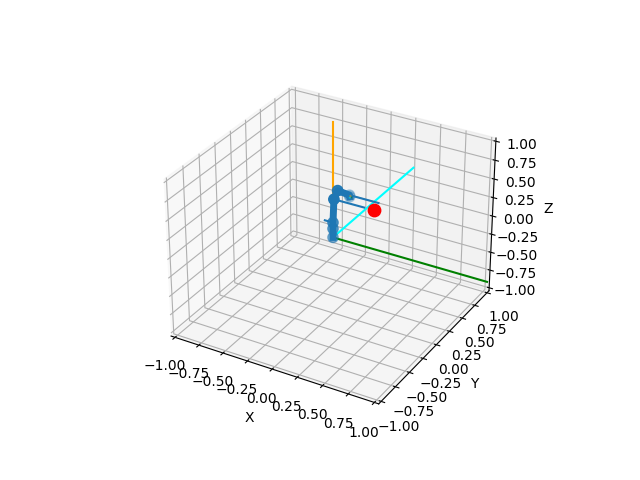

b'0.5493,3.0832,-39.4626,0.0000,-37.6987,-0.0000,0.0000\r\n'


In [208]:
# moveFK(-50.0000, 13.6240, -27.2946, 2.9204, -37.5994, 50)

moveFK( 0.5493, 3.0832, -39.4626, 0, -37.6987, 0)
# moveFK(-45.7078, 13.9721, -26.8589, 0.4246, -36.9942, 34.1682)

In [68]:
setSpeed(30)
# move(-0.05865180705990582, 0.18735225203415323, 0.4,0,0,0, skip=False)
target_position = [0.0, 0.2145, 0.396394]
target_orientation = [0,0,-1]
move3("Y", 0.0, 0.0)


# target_position = [0.0, 0.27, 0.37]
# target_orientation = [0,0,-1]
# move3("Y", 0.0, 0.0)
# target_position = [0, 0.3, 0.5]
# target_orientation = [0,0,-1]
# move3("Y", 30.0, 30.0)

# target_position = [0, 0.2, 0.5]
# target_orientation = [0,0,-1]
# move3("Y", 30.0, 0.0)



# target_position = [0, 0.4, 0.5]
# target_orientation = [0,0,-1]
# move3("Y", 6000, "MV")
# target_position = [0, 0.2, 0.4]
# target_orientation = [0,0,-1]
# move3("Y", 6000, "MV")
# target_position = [0, 0.3, 0.4]
# target_orientation = [0,0,-1]
# move3("Y", 6000, "MV")
# target_position = [0, 0.4, 0.4]
# target_orientation = [0,0,-1]
# move3("Y", 2000)

# # doIK()
# updatePlot(ik)
# command = 'MN{:.4f},{:.4f},{:.4f},{:.4f},{:.4f},{:.4f},{:.0f}\r\n'.format(0.0000,1.7263,-34.7456,-0.0000,-53.5281,0.0000,1000.0000)
# # print(command)
# sendCommand(command)
# # setSpeed(50)
# command = 'MN{:.4f},{:.4f},{:.4f},{:.4f},{:.4f},{:.4f},{:.4f}\r\n'.format(0.0000,16.5762,-17.4898,-0.0000,-55.9340,0.0000,5.0000)
# sendCommand(command)
# # setSpeed(50)
# command = 'MN{:.4f},{:.4f},{:.4f},{:.4f},{:.4f},{:.4f},{:.0f}\r\n'.format(-1.2053,16.5179,-17.5650,-0.0000,-55.9171,0.0000,int(110.2910))
# sendCommand(command)

b'SP30\n'
Command Send
b'\r\n'
Command Read
MN0.0000,-16.3263,-47.2978,-0.0000,-59.0285,0.0000,0.00,0.00

b'MN0.0000,-16.3263,-47.2978,-0.0000,-59.0285,0.0000,0.00,0.00\n'
Command Send
b'\r\n'
Command Read


In [166]:
np.arange(0, 2*np.pi, 0.1)
count = math.ceil(2*np.pi/0.1)
accelSpeed = 50
speed = 1000
accel = (count * 20) / 100
decelCounter = count - accel
ratio = (speed - accelSpeed) / accel

print(accel)
print(ratio)
print(decelCounter)

12.6
75.39682539682539
50.4


b'SP20.0\n'
Command Send
b'\r\n'
Command Read
test
0.6
3.4
6.283185307179586
[0.0, 0.33, 0.38]
MN0.0000,7.3509,-28.6642,0.0000,-53.9849,0.0000,20.00,20.00

b'MN0.0000,7.3509,-28.6642,0.0000,-53.9849,0.0000,20.00,20.00\n'
Command Send
b'\r\n'
Command Read
[0.07274379414605454, 0.2167082530762286, 0.38]
MN-18.5557,-12.4550,-47.5723,-0.0000,-54.8827,0.0000,20.00,20.00

b'MN-18.5557,-12.4550,-47.5723,-0.0000,-54.8827,0.0000,20.00,20.00\n'
Command Send
b'\r\n'
Command Read
[-0.06054419962463426, 0.19770851033091105, 0.38]
MN17.0261,-17.1284,-51.0320,-0.0000,-56.0964,0.0000,20.00,20.00

b'MN17.0261,-17.1284,-51.0320,-0.0000,-56.0964,0.0000,20.00,20.00\n'
Command Send
b'\r\n'
Command Read
[-0.02235323985591407, 0.3268136229320293, 0.38]
MN3.9128,6.9009,-29.1715,-0.0000,-53.9277,0.0000,20.00,20.00

b'MN3.9128,6.9009,-29.1715,-0.0000,-53.9277,0.0000,20.00,20.00\n'
Command Send
b'\r\n'
Command Read
MN0.0000,7.3509,-28.6642,0.0000,-53.9849,0.0000,20.00,0.00

b'MN0.0000,7.3509,-28.6642,0.0000,-53.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


b'\r\n'
Command Read
[[0.0, 0.33, 0.38], [0.07274379414605454, 0.2167082530762286, 0.38], [-0.06054419962463426, 0.19770851033091105, 0.38], [-0.02235323985591407, 0.3268136229320293, 0.38]]


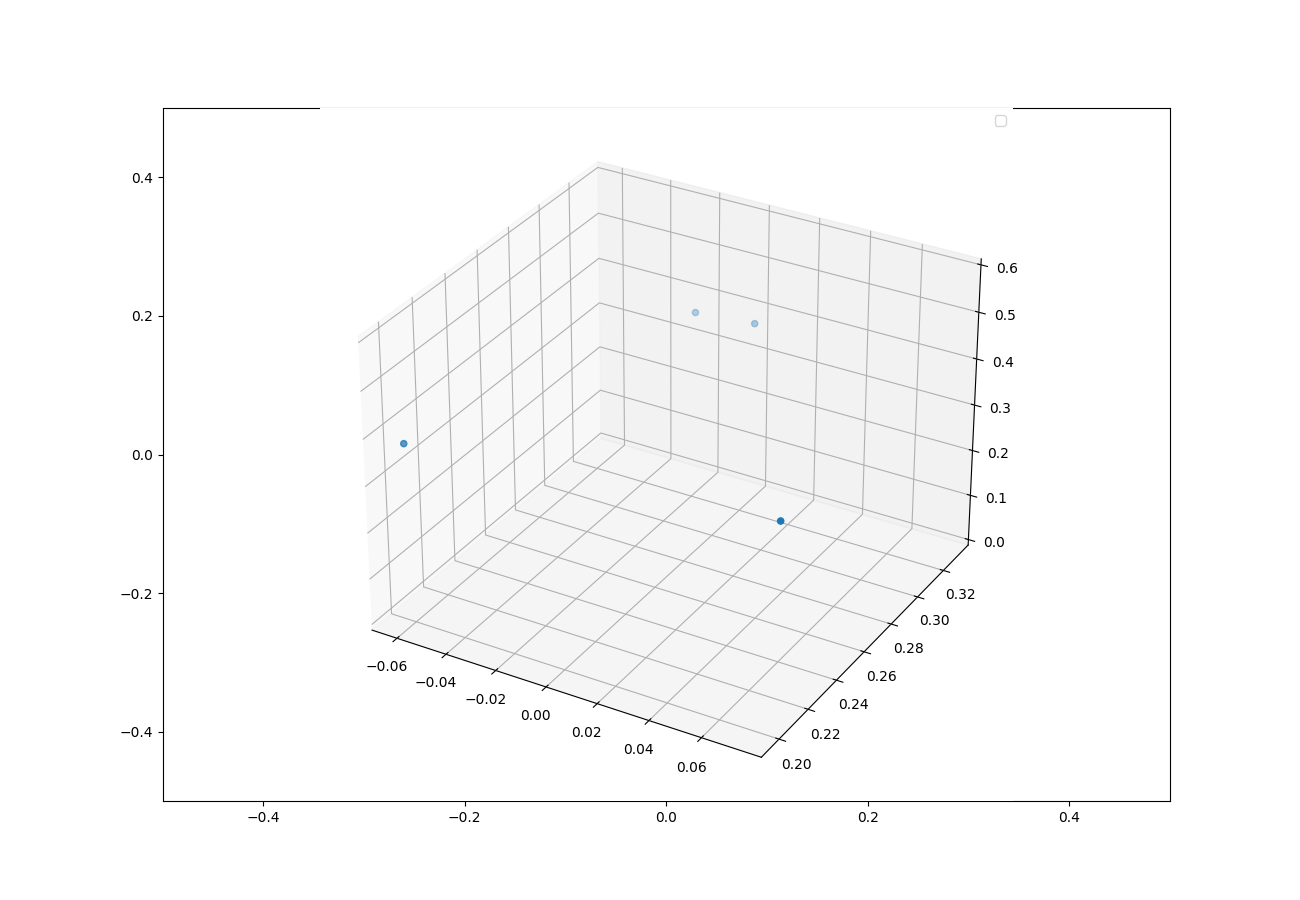

In [52]:
###### # move(0.0,       0.3,   0.4,0,180,0)
setSpeed(20.0)
# target_position = [0.0, 0.33, 0.38]
# target_orientation = [0,0,-1]
# move3("Y", 0.0, 20.0)
start = 0
stop = 2*np.pi
step = 2
accelDuration = 15
decelDuration = 15
range = np.arange(start, stop, step)
maxSpeed = 1000
accelSpeed = 200
decelSpeed = 50

minSpeed = 100
count = math.ceil((stop-start)/step)
accel = (count * accelDuration / 100)
decel = (count * decelDuration / 100)
accelRatio = (maxSpeed - accelSpeed) / accel
decelRatio = (maxSpeed - decelSpeed) / decel
decelCounter = count - decel
index = 1

print("test")
print(accel)
# print(ratio)
print(decelCounter)

r = 0.08
x,y,z = (0.0, 0.25, 0.38)

# for alpha in np.arange(0, 1*np.pi, .08):
#     x = r * np.cos(alpha) + x
#     y = r * np.sin(alpha) + y
    
#     move(x,       y,   0.4,0,180,0)

t = 0
stepSize = 2
positions = []
waypoints = []

print((2*np.pi) - 0/0.1)
currSpeed = accelSpeed
for alpha in range:
    y0 = r * math.cos(alpha) + y
    x0 = r * math.sin(alpha) + x
    
    positions.append([x0, y0, z])
    
    
    
    target_position = [x0, y0, z]
    target_orientation = [0,0,-1]
    
    print(target_position)
    # setSpeed(currSpeed)
    move3("Y", 20.0, 20.0)
    # move(x0, y0, z, 0,0,0);
    if index < accel:
        currSpeed += accelRatio
    
        if (currSpeed > maxSpeed):
            currSpeed = maxSpeed
    elif index > accel and index > decelCounter :
        currSpeed -= decelRatio
        
        if (currSpeed < decelSpeed):
            currSpeed = decelSpeed
    else:
        currSpeed = maxSpeed
    index = index + 1

    # setSpeed(minSpeed)
target_position = [positions[0][0], positions[0][1], positions[0][2]]
target_orientation = [0,0,-1]
move3("Y", 20.0, 0.0)
print(positions)
positions = np.array(positions)
X,Y,Z = positions[:,0],positions[:,1],positions[:,2]
fig = plt.figure()
fig.set_figheight(9)
fig.set_figwidth(13)
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
ax = fig.add_subplot(111, projection="3d")
ax.set_zlim(0.0, 0.6)
ax.scatter(X,Y,Z)
plt.ion()

ax.legend()